In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
import plotly.graph_objs as go
sns.set_theme()

## Upload the datasets
Quick Dataset Overview

In [2]:
demo=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\demographics_de.csv")
covid=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de.csv",parse_dates = ['date'], index_col="date")
vaccines=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de_vaccines.csv",parse_dates = ['date'],index_col="date")

In [5]:
#Demo
print(demo.shape)
demo.head()

(192, 4)


,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


In [4]:
#covid
print(covid.shape)
covid.sample(7)

(2790555, 7)


,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-11-18,Bayern,LK Aschaffenburg,35-59,F,13,0,13
2021-10-15,Baden-Wuerttemberg,LK Biberach,15-34,M,7,0,7
2021-04-03,Baden-Wuerttemberg,LK Schwaebisch Hall,35-59,F,15,0,15
2022-08-17,Brandenburg,SK Brandenburg a.d.Havel,60-79,F,5,0,5
2021-03-22,Brandenburg,SK Potsdam,05-14,M,1,0,1
2022-05-27,Baden-Wuerttemberg,LK Enzkreis,05-14,F,1,0,1
2022-03-19,Hessen,LK Main-Taunus-Kreis,00-04,F,5,0,5


In [5]:
#vaccines
print(vaccines.shape)
vaccines.head(7)

(757, 8)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
2021-01-01,25723,25723,0,232614,27,7,232650,0
2021-01-02,47835,47835,0,280446,28,7,280485,0


In [21]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [6]:
demo.nunique()

state          16
gender          2
age_group       6
population    192
dtype: int64

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2890909 entries, 2020-03-27 to 2022-08-24
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   county     object
 2   age_group  object
 3   gender     object
 4   cases      int64 
 5   deaths     int64 
 6   recovered  int64 
dtypes: int64(3), object(4)
memory usage: 176.4+ MB


In [7]:
covid.nunique()

state         16
county       411
age_group      6
gender         2
cases        951
deaths        21
recovered    955
dtype: int64

In [8]:
covid.describe()

,cases,deaths,recovered
count,2.790555e+06,2.790555e+06,2.790555e+06
mean,1.333496e+01,5.761148e-02,1.305119e+01
std,3.009627e+01,3.214108e-01,3.006811e+01
min,1.000000e+00,0.000000e+00,-1.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00
50%,4.000000e+00,0.000000e+00,4.000000e+00
75%,1.200000e+01,0.000000e+00,1.200000e+01
max,2.156000e+03,2.100000e+01,2.156000e+03


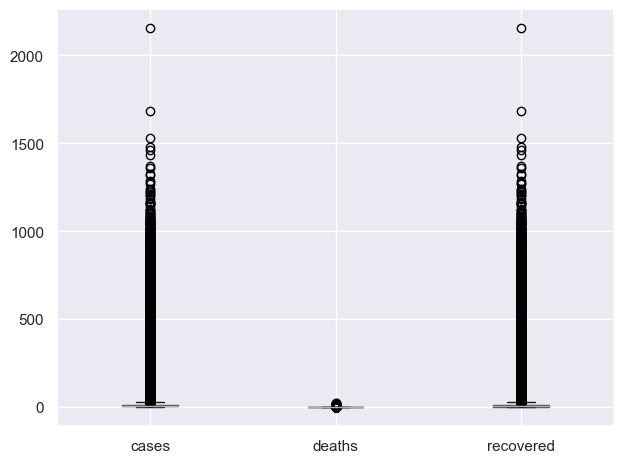

In [9]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = covid.boxplot()
fig.tight_layout()

In [6]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2020-12-27 to 2023-01-22
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   doses                757 non-null    int64
 1   doses_first          757 non-null    int64
 2   doses_second         757 non-null    int64
 3   pfizer_cumul         757 non-null    int64
 4   moderna_cumul        757 non-null    int64
 5   astrazeneca_cumul    757 non-null    int64
 6   persons_first_cumul  757 non-null    int64
 7   persons_full_cumul   757 non-null    int64
dtypes: int64(8)
memory usage: 53.2 KB


In [7]:
vaccines.nunique()

doses                  755
doses_first            729
doses_second           719
pfizer_cumul           757
moderna_cumul          752
astrazeneca_cumul      573
persons_first_cumul    757
persons_full_cumul     739
dtype: int64

In [ ]:
vaccines.hist(figsize=(10,7))
plt.tight_layout()
plt.show()

In [ ]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = vaccines.boxplot()
fig.tight_layout()
# astrazeneca_cumul & persons_first_cumul have outliers

## Identify Missing Data

In [6]:
print(demo.isnull().sum())
print(covid.isnull().sum())
print(vaccines.isnull().sum())

state         0
gender        0
age_group     0
population    0
dtype: int64
state             0
county            0
age_group     13876
gender       125625
cases             0
deaths            0
recovered         0
dtype: int64
doses                  0
doses_first            0
doses_second           0
pfizer_cumul           0
moderna_cumul          0
astrazeneca_cumul      0
persons_first_cumul    0
persons_full_cumul     0
dtype: int64


In [7]:
#rows that miss both age_group and gender
covid[covid.age_group.isnull() &covid.gender.isnull()]

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,NaN,NaN,1,0,1
2022-01-19,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-20,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-25,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-31,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...
2021-03-24,Thueringen,LK Sonneberg,NaN,NaN,2,0,2
2021-11-24,Thueringen,LK Unstrut-Hainich-Kreis,NaN,NaN,1,0,1
2022-12-20,Thueringen,SK Jena,NaN,NaN,1,0,1


In [14]:
#Percentage of missing age data out of all

print(f'In age_group {len(covid[covid.age_group.isnull()])*100/len(covid)}% of values are missing')

In age_group 0.47998743647759234% of values are missing


In [15]:
#Percentage of missing gender data out of all
print(f'In gender {len(covid[covid.gender.isnull()])*100/len(covid)}% of values are missing')

In gender 4.34551900457607% of values are missing


## Demographic parameters

In [41]:
demo

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736
...,...,...,...,...
187,Thueringen,male,05-14,92545
188,Thueringen,male,15-34,214553
189,Thueringen,male,35-59,384822
190,Thueringen,male,60-79,264189


In [22]:
#Add a column with area ( km^2)
area={'Baden-Wuerttemberg':35752, 'Bayern':70552, 'Berlin':892, 'Brandenburg':29480, 'Bremen':419,
       'Hamburg':755, 'Hessen':21115, 'Mecklenburg-Vorpommern':23180, 'Niedersachsen':47609,
       'Nordrhein-Westfalen':34085, 'Rheinland-Pfalz':19853, 'Saarland':2569, 'Sachsen':18416,
       'Sachsen-Anhalt':20446, 'Schleswig-Holstein':15799, 'Thueringen':16172}
demo['area'] = demo['state'].map(area)
demo

,state,gender,age_group,population,area
0,Baden-Wuerttemberg,female,00-04,261674,35752
1,Baden-Wuerttemberg,female,05-14,490822,35752
2,Baden-Wuerttemberg,female,15-34,1293488,35752
3,Baden-Wuerttemberg,female,35-59,1919649,35752
4,Baden-Wuerttemberg,female,60-79,1182736,35752
...,...,...,...,...,...
187,Thueringen,male,05-14,92545,16172
188,Thueringen,male,15-34,214553,16172
189,Thueringen,male,35-59,384822,16172
190,Thueringen,male,60-79,264189,16172


In [95]:

# group the data frame by state and apply a lambda function to calculate population density
density = demo.groupby('state').apply(lambda x: x['population'].sum() / x['area'].iloc[0])

# rename the columns of the resulting data frame
density = density.reset_index().rename(columns={0: 'population_density'})
print(density)
# merge the original data frame with the density data frame on the "state" column
demo = pd.merge(demo, density, on='state')

demo

                     state  population_density
0       Baden-Wuerttemberg          309.619965
1                   Bayern          185.348693
2                   Berlin         4086.127803
3              Brandenburg           85.207497
4                   Bremen         1630.038186
5                  Hamburg         2438.647682
6                   Hessen          296.746815
7   Mecklenburg-Vorpommern           69.442407
8            Niedersachsen          167.666786
9      Nordrhein-Westfalen          526.115623
10         Rheinland-Pfalz          205.754496
11                Saarland          385.562086
12                 Sachsen          221.434459
13          Sachsen-Anhalt          108.007483
14      Schleswig-Holstein          183.347807
15              Thueringen          132.521952


,state,gender,age_group,population,area,population_density
0,Baden-Wuerttemberg,female,00-04,261674,35752,309.619965
1,Baden-Wuerttemberg,female,05-14,490822,35752,309.619965
2,Baden-Wuerttemberg,female,15-34,1293488,35752,309.619965
3,Baden-Wuerttemberg,female,35-59,1919649,35752,309.619965
4,Baden-Wuerttemberg,female,60-79,1182736,35752,309.619965
...,...,...,...,...,...,...
187,Thueringen,male,05-14,92545,16172,132.521952
188,Thueringen,male,15-34,214553,16172,132.521952
189,Thueringen,male,35-59,384822,16172,132.521952
190,Thueringen,male,60-79,264189,16172,132.521952


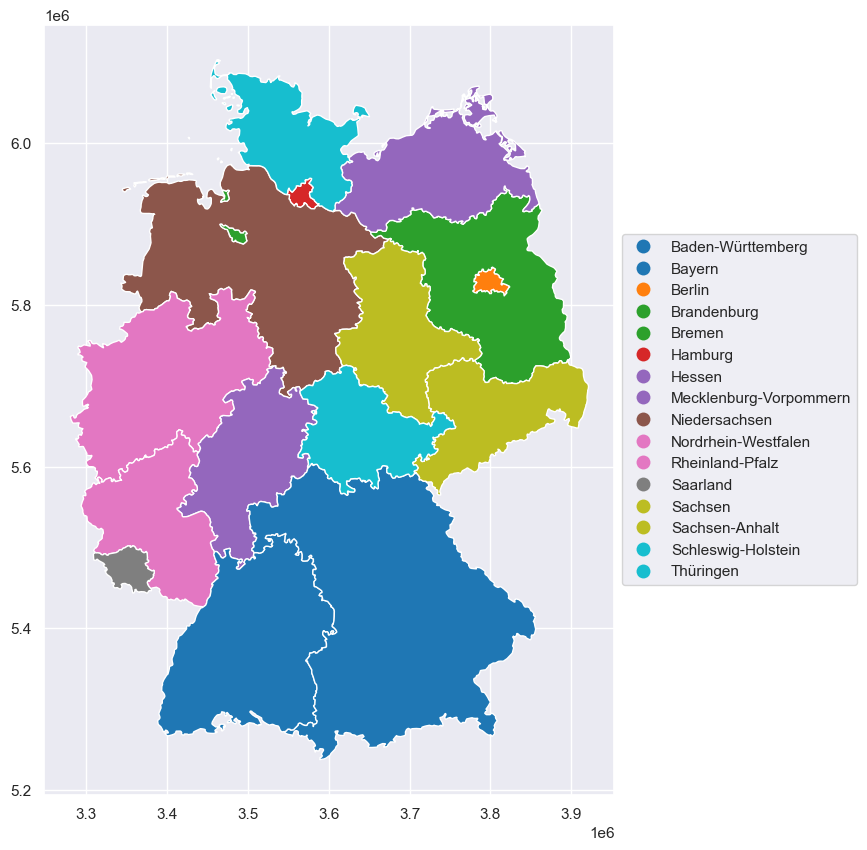

In [91]:
# Map presentation with geoPandas
gdf = gpd.read_file("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\de_state.shp")
gdf.plot(categorical = True, column = 'GEN', legend = True,figsize = (10,10),edgecolor = 'white', legend_kwds = {'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.show()

In [52]:
DensityByState = gdf.join(density)
DensityByState.reset_index(inplace = True)
DensityByState


,index,ADE,RS,RS_0,GEN,geometry,state,population_density
0,0,2,02,020000000000,Hamburg,"MULTIPOLYGON (((3578695.661 5955304.456, 35781...",Baden-Wuerttemberg,309.619965
1,1,2,03,030000000000,Niedersachsen,"MULTIPOLYGON (((3354775.046 5942939.764, 33546...",Bayern,185.348693
2,2,2,04,040000000000,Bremen,"MULTIPOLYGON (((3468658.496 5898364.974, 34702...",Berlin,4086.127803
3,3,2,05,050000000000,Nordrhein-Westfalen,"POLYGON ((3477450.781 5820982.368, 3479895.578...",Brandenburg,85.207497
4,4,2,06,060000000000,Hessen,"POLYGON ((3535084.230 5721608.644, 3535279.888...",Bremen,1630.038186
5,5,2,07,070000000000,Rheinland-Pfalz,"POLYGON ((3418896.770 5638774.098, 3419770.012...",Hamburg,2438.647682
6,6,2,08,080000000000,Baden-Württemberg,"MULTIPOLYGON (((3475285.294 5283087.348, 34749...",Hessen,296.746815
7,7,2,09,090000000000,Bayern,"POLYGON ((3609551.484 5269631.549, 3610838.499...",Mecklenburg-Vorpommern,69.442407
8,8,2,10,100000000000,Saarland,"POLYGON ((3360522.937 5500321.672, 3361336.128...",Niedersachsen,167.666786
9,9,2,11,110000000000,Berlin,"POLYGON ((3812872.568 5833365.938, 3813771.098...",Nordrhein-Westfalen,526.115623


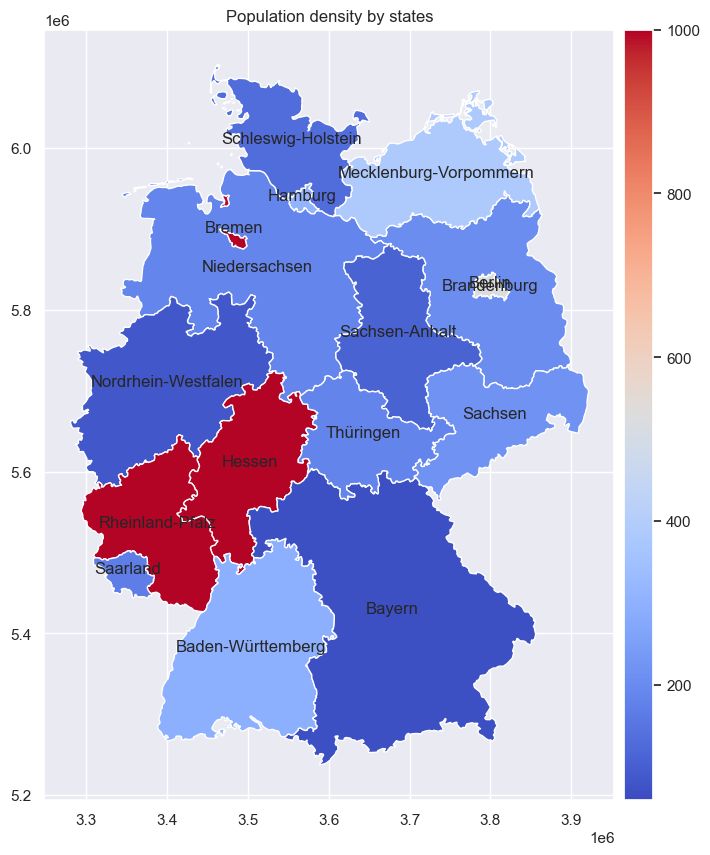

In [88]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Population density by states")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
DensityByState.plot( column='population_density', ax=ax, cmap='coolwarm', legend=True, cax = cax, vmin=60, vmax=1000)
DensityByState.apply(lambda x: ax.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)


plt.show()



#### Is there a correlation between population density and number of cases?

In [119]:

CovidByState=covid.groupby('state').sum()
CovidByState=pd.merge(CovidByState,density,on="state")
CovidByState=CovidByState.set_index('state')
CovidByState=CovidByState.sort_values("population_density",ascending=False)
CovidByState

,cases,deaths,recovered,population_density
state,,,,
Berlin,1395995,5236,1357668,4086.127803
Hamburg,792813,3352,774605,2438.647682
Bremen,295200,913,288463,1630.038186
Nordrhein-Westfalen,7741625,29730,7552531,526.115623
Saarland,477361,2002,468859,385.562086
Baden-Wuerttemberg,4955962,18494,4879061,309.619965
Hessen,2838126,11857,2779922,296.746815
Sachsen,1927930,16518,1881262,221.434459
Rheinland-Pfalz,1715006,6626,1680059,205.754496


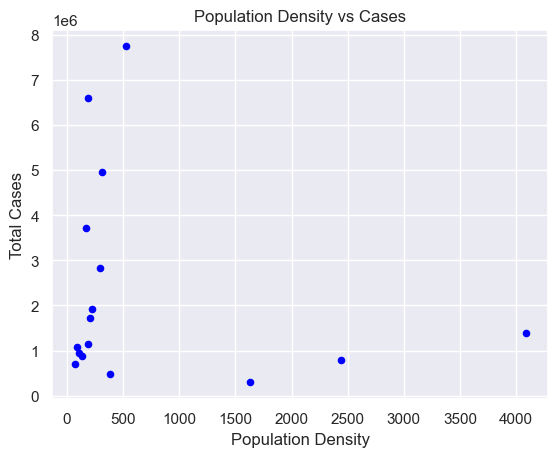

In [120]:
#create scatter plot  with population density and cases number to see possible correlation
CovidByState.plot.scatter(x='population_density',y='cases',color='blue')
plt.title('Population Density vs Cases')
plt.xlabel('Population Density')
plt.ylabel('Total Cases')
plt.show()

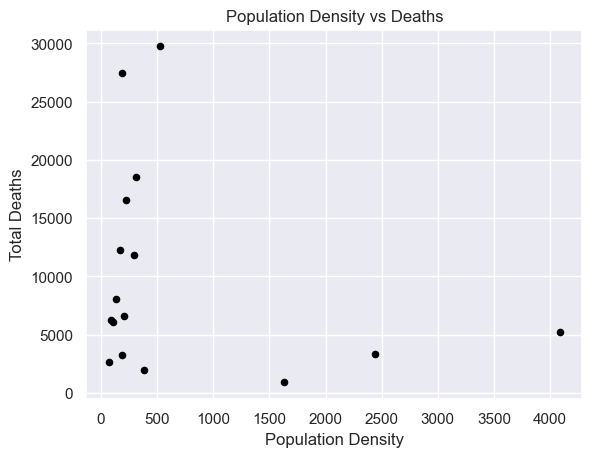

In [118]:
#create scatter plot  with population density and death number to see possible correlation
CovidByState.plot.scatter(x='population_density',y='deaths',color='black')
plt.title('Population Density vs Deaths')
plt.xlabel('Population Density')
plt.ylabel('Total Deaths')
plt.show()

In [23]:

total=demo[['age_group','gender','population']] # df without states and area
print(demo['population'].sum())           # total population in Germany
total['percent']=(total['population']/demo['population'].sum())*100
total

83019213


C:\Users\DannyC19\AppData\Local\Temp\ipykernel_20360\1756338042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['percent']=(total['population']/demo['population'].sum())*100


,age_group,gender,population,percent
0,00-04,female,261674,0.315197
1,05-14,female,490822,0.591215
2,15-34,female,1293488,1.558059
3,35-59,female,1919649,2.312295
4,60-79,female,1182736,1.424653
...,...,...,...,...
187,05-14,male,92545,0.111474
188,15-34,male,214553,0.258438
189,35-59,male,384822,0.463534
190,60-79,male,264189,0.318226


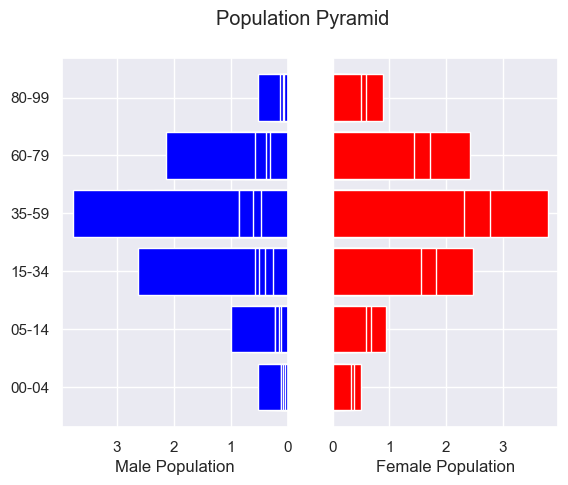

In [31]:

# separate the data frame into male and female populations
male_pop = total[total['gender'] == 'male']
female_pop = total[total['gender'] == 'female']

# reverse the female population data frame
female_pop = female_pop.iloc[::-1]

# create a figure with two subplots
fig, ax = plt.subplots(ncols=2, sharey=True)

# plot the male population as a horizontal bar chart on the left subplot
ax[0].barh(male_pop['age_group'], male_pop['percent'], align='center', color='blue')
ax[0].invert_xaxis()
ax[0].set_xlabel('Male Population')

# plot the female population as a horizontal bar chart on the right subplot
ax[1].barh(female_pop['age_group'], female_pop['percent'], align='center', color='red')
ax[1].set_xlabel('Female Population')

# add a title to the figure
fig.suptitle('Population Pyramid')

# show the plot
plt.show()




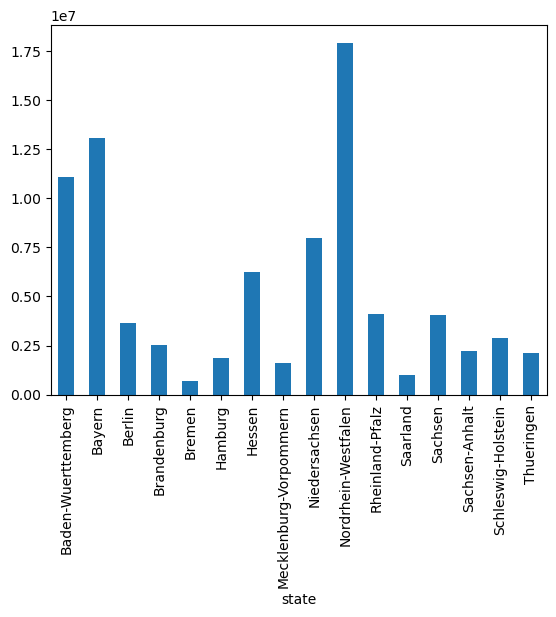

In [49]:
#population by state
demo.groupby('state')['population'].sum().plot.bar()
plt.show()

<AxesSubplot:>

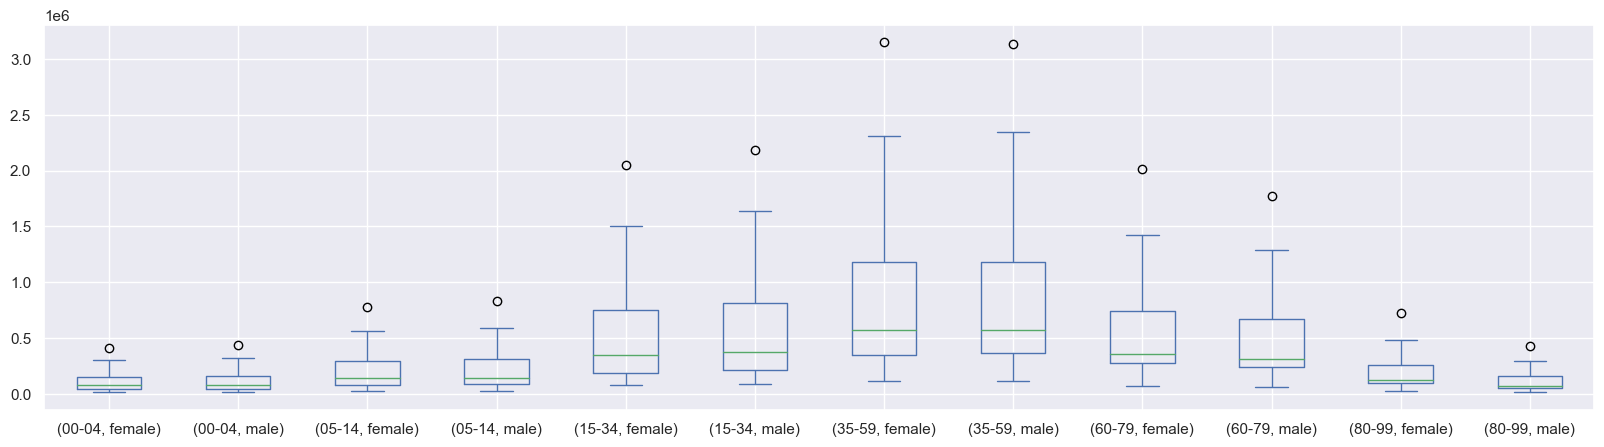

In [156]:
demo.pivot_table(index='state',columns=['age_group','gender'], values="population", aggfunc='sum').plot.box(figsize=(20,5))


<AxesSubplot:xlabel='state'>

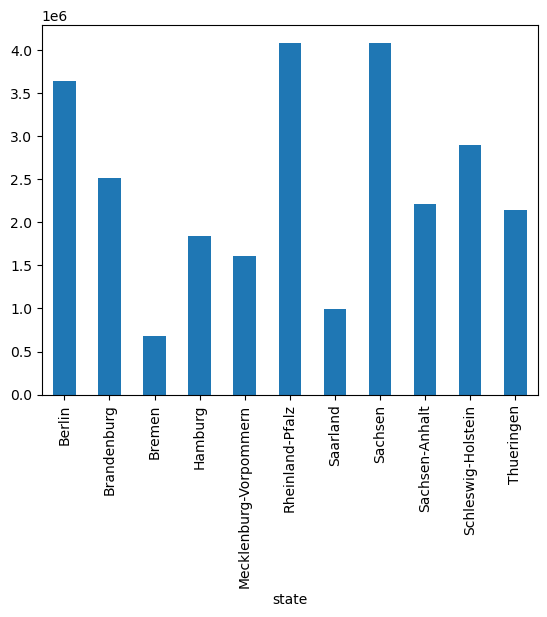

In [56]:
#divide the states to small and large by population
small=demo.groupby('state').filter(lambda grp:grp['population'].sum()<5000000)
large=demo.groupby('state').filter(lambda grp:grp['population'].sum()>5000000)
small.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

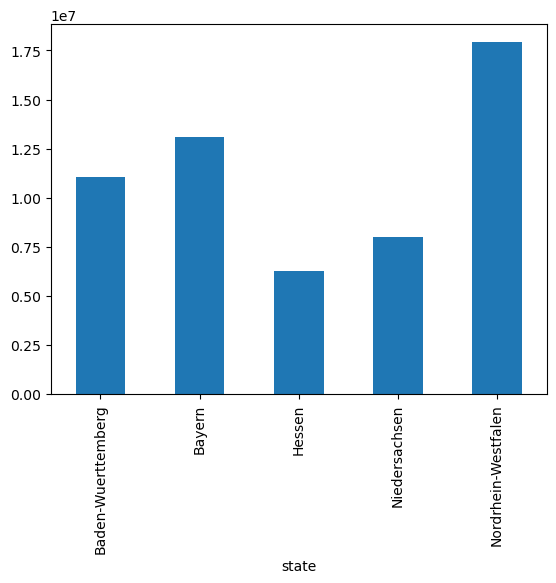

In [57]:
large.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

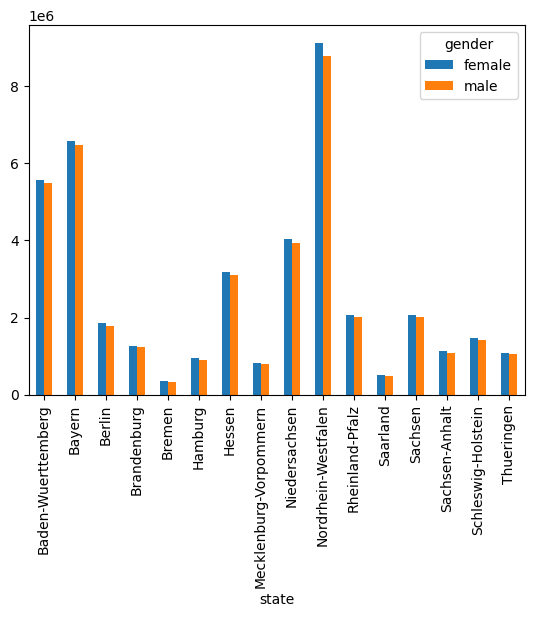

In [18]:
#number of male/ female by state
demo.pivot_table(index='state', columns='gender',values='population', aggfunc='sum').plot.bar()

<AxesSubplot:xlabel='state'>

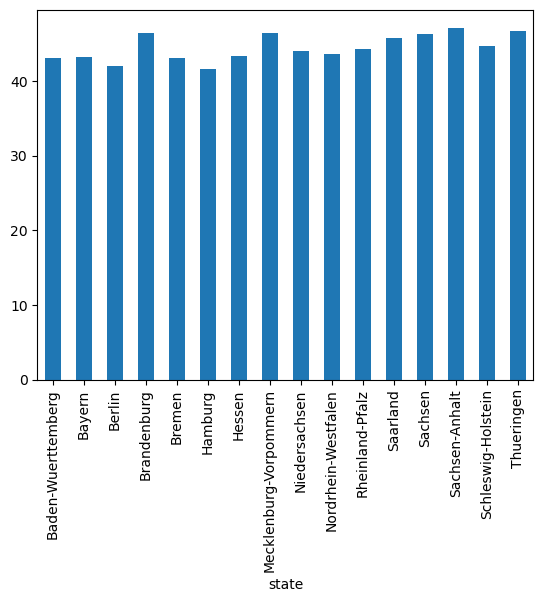

In [46]:

#avg age by state
demo_age=demo[['state','age_group','population']]
demo_age=demo_age.replace({'00-04':2, '05-14':9.5, '15-34':24.5, '35-59':47, '60-79':69.5, '80-99':89.5})

demo_age['a_pop']=demo_age['age_group']*demo_age['population']
total=demo.groupby('state')['population'].sum()


ave=demo_age.groupby('state')['a_pop'].sum()/total
ave.plot.bar()
# no significant difference

<AxesSubplot:xlabel='state'>

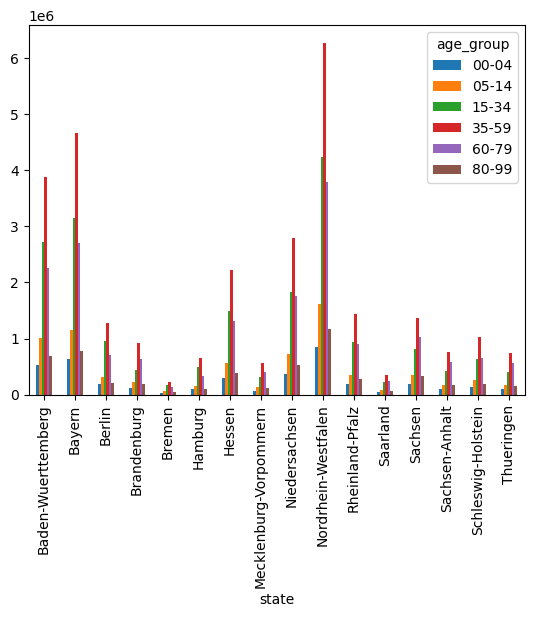

In [48]:
#Age representation per state
#demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()
demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()

## Vaccines analysis

### manufacturers

In [8]:
vaccines

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783


In [58]:
# Add colums with manufacturers - convert the cummulative sum into real values
vaccines['pfizer']=vaccines['pfizer_cumul'].diff().fillna(vaccines['pfizer_cumul'].iloc[0])
vaccines['moderna']=vaccines['moderna_cumul'].diff().fillna(vaccines['moderna_cumul'].iloc[0])
vaccines['astrazeneca']=vaccines['astrazeneca_cumul'].diff().fillna(vaccines['astrazeneca_cumul'].iloc[0])
vaccines.head()


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,...,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul,first_dose%,second_dose%,third_dose%
date,,,,,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,...,1.0,0.0,99.963156,0.032751,0.004094,0.0,0,0.029423,0.0,0.0
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,...,1.0,0.0,99.988934,0.005533,0.005533,0.0,0,0.051193,0.0,0.0
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,...,1.0,0.0,99.998009,0.000000,0.001991,0.0,0,0.111696,0.0,0.0
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,...,0.0,0.0,99.998443,0.001557,0.000000,0.0,0,0.189043,0.0,0.0
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,...,0.0,0.0,99.995999,0.004001,0.000000,0.0,0,0.249252,0.0,0.0


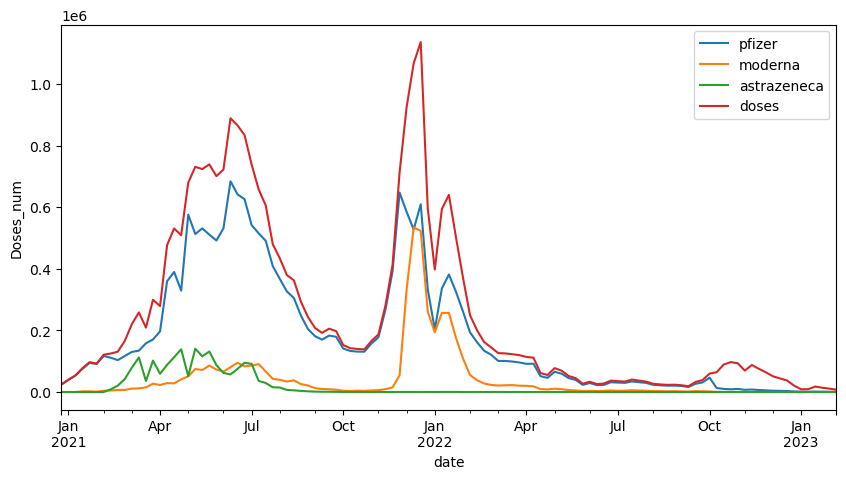

In [29]:
#What is the contribution of each manufacturer?
week_vac=vaccines.resample('W').mean()
week_vac[['pfizer', 'moderna','astrazeneca','doses']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()
#The most commony used manufacturer in Germany is pfizer
#Looks like there is other manufacturers present

In [10]:
#Does all manufacturers sum to the daily doses number?
#len(vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca']].index)
print(f"There are only {len(vaccines[(vaccines['doses'] == vaccines['pfizer'] + vaccines['moderna'] + vaccines['astrazeneca'])].index)} days in which all manufacturers sum to the daily doses number")
vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca'] ].index
#There are other manufacturers not presented in the data

There are only 43 days in which all manufacturers sum to the daily doses number


DatetimeIndex(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-03', '2021-01-05', '2021-01-06',
               '2021-01-08', '2021-01-09', '2021-01-11', '2021-01-13',
               '2021-01-14', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-22', '2021-01-23', '2021-01-25', '2021-01-26',
               '2021-01-28', '2021-02-04', '2021-02-09', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-04',
               '2021-03-06', '2021-03-07', '2021-03-09', '2021-03-11',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-22',
               '2021-04-03', '2021-04-05', '2021-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [11]:
#create another colum for other manufacturers
vaccines['other']=vaccines['doses']-(vaccines['moderna']+vaccines['astrazeneca']+vaccines['pfizer'])
vaccines

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other
date,,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0,0.0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0,0.0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0,0.0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0,0.0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,11002,174,181,138179497,31584858,12803049,64869802,63555851,918.0,13.0,0.0,10071.0
2023-02-02,12845,215,192,138180485,31584864,12803049,64870017,63556043,988.0,6.0,0.0,11851.0
2023-02-03,8734,198,153,138181255,31584869,12803049,64870215,63556196,770.0,5.0,0.0,7959.0


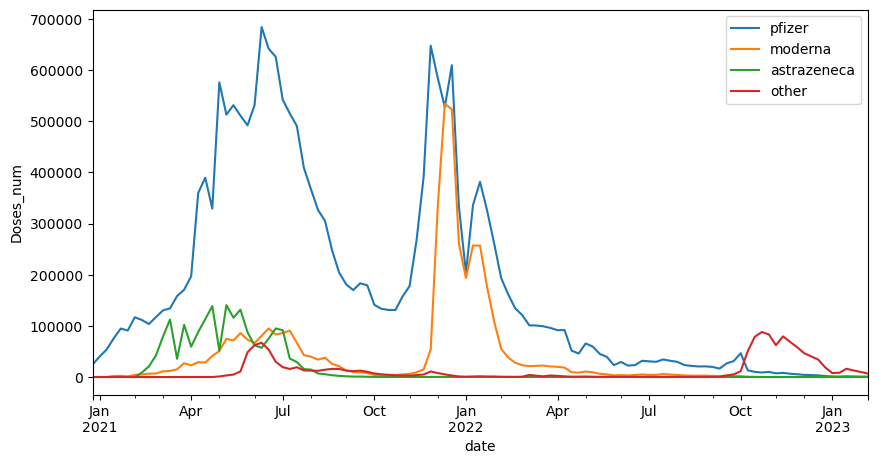

In [13]:
#What is the contribution of each manufacturer (including other manufactorers)?
week_vac[['pfizer', 'moderna','astrazeneca','other']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()

In [14]:
#Percentage of each manufacturer
vaccines['pfizer%']=(vaccines['pfizer']/vaccines['doses'])*100
vaccines['moderna%']=(vaccines['moderna']/vaccines['doses'])*100
vaccines['astrazeneca%']=(vaccines['astrazeneca']/vaccines['doses'])*100
vaccines['other%']=(vaccines['other']/vaccines['doses'])*100
print(vaccines.shape)
vaccines.tail(10)
#df[percent] = (df['column_name'] / df['column_name'].sum()) * 100

(771, 16)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%
date,,,,,,,,,,,,,,,,
2023-01-27,12438,186,151,138176598,31584572,12803048,64869169,63555411,1004.0,78.0,0.0,11356.0,8.072037,0.627110,0.000000,91.300852
2023-01-28,2847,60,45,138176848,31584654,12803048,64869229,63555456,250.0,82.0,0.0,2515.0,8.781173,2.880225,0.000000,88.338602
2023-01-29,679,8,11,138176956,31584654,12803048,64869237,63555467,108.0,0.0,0.0,571.0,15.905744,0.000000,0.000000,84.094256
2023-01-30,7007,150,83,138177493,31584725,12803049,64869387,63555550,537.0,71.0,1.0,6398.0,7.663765,1.013272,0.014271,91.308691
2023-01-31,11690,241,120,138178579,31584845,12803049,64869628,63555670,1086.0,120.0,0.0,10484.0,9.289991,1.026518,0.000000,89.683490
2023-02-01,11002,174,181,138179497,31584858,12803049,64869802,63555851,918.0,13.0,0.0,10071.0,8.343937,0.118160,0.000000,91.537902
2023-02-02,12845,215,192,138180485,31584864,12803049,64870017,63556043,988.0,6.0,0.0,11851.0,7.691709,0.046711,0.000000,92.261580
2023-02-03,8734,198,153,138181255,31584869,12803049,64870215,63556196,770.0,5.0,0.0,7959.0,8.816121,0.057248,0.000000,91.126632
2023-02-04,1707,60,34,138181336,31584878,12803049,64870275,63556230,81.0,9.0,0.0,1617.0,4.745167,0.527241,0.000000,94.727592


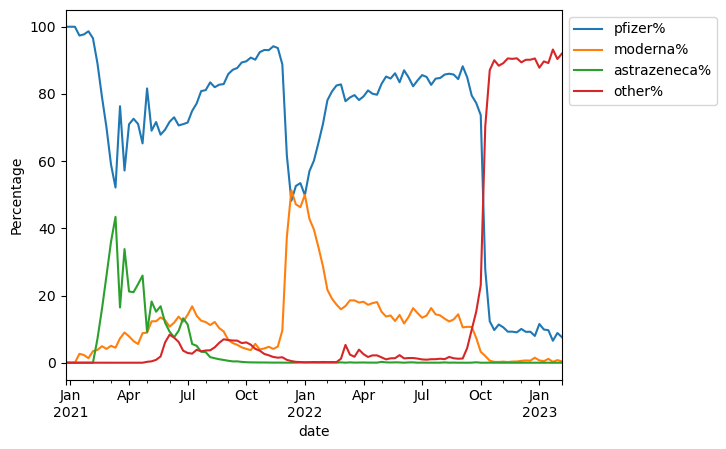

In [17]:
#What is the percentage usege of each manufacturer?
week_vac[['pfizer%', 'moderna%','astrazeneca%','other%']].plot(ylabel='Percentage')
plt.legend(bbox_to_anchor=(1.0, 1.0))
# In Jan 22 it was a reduction in pfizer use that was replaced by moderna
#astrazeneca was mainly used in the begining Feb-Jul 21 and abundunt afterwords. 
#Starting from Sep 2022 there is a shift to other manufacturers.

### Vaccination patterns

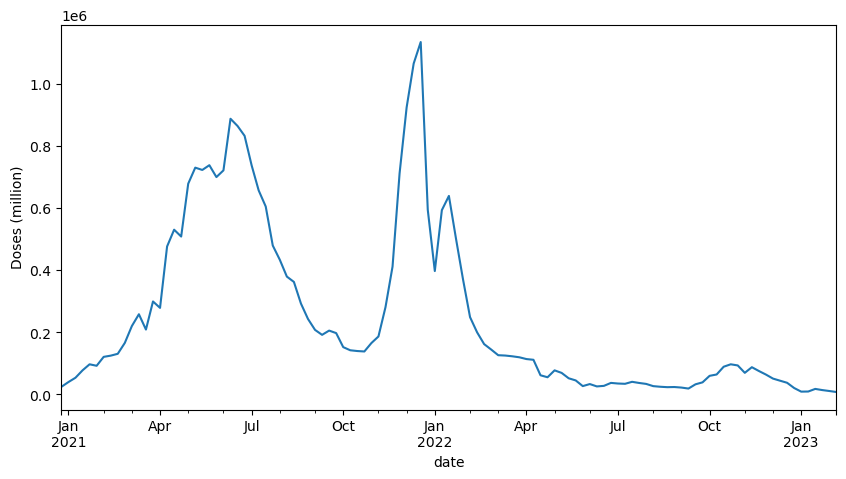

In [18]:
#Vaccination pattern
week_vac['doses'].plot(ylabel="Doses (million)", figsize=(10,5))
plt.show()


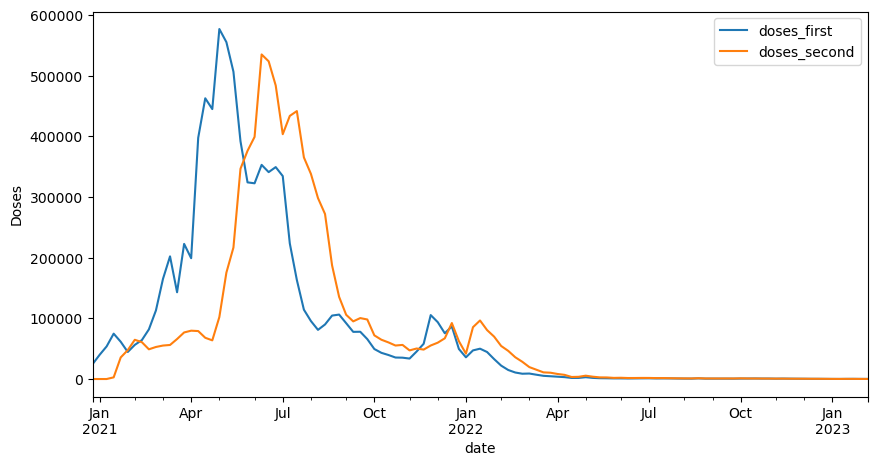

In [19]:
#First vs second dose pattern
week_vac[['doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

In [20]:
#when dose1+dose2 ==daily doses?
print(f"There are only {len(vaccines[(vaccines['doses']==vaccines['doses_first']+vaccines['doses_second'])].index)} \
dated in which dose1 +dose2 =total daily doses")

There are only 155 dated in which dose1 +dose2 =total daily doses


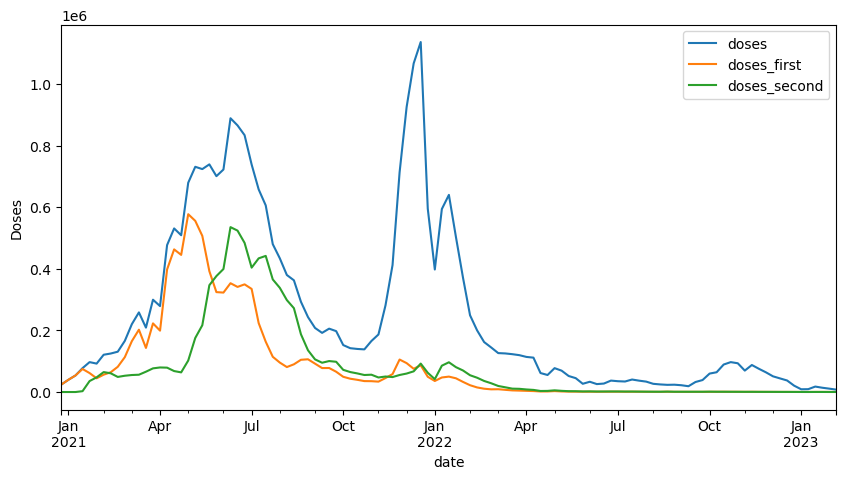

In [21]:
#total doses , first and second shot
week_vac[['doses', 'doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()
# There is a third dose not presented in the data

In [22]:
#calculate the third dose and add as another column
vaccines['doses_third']=vaccines['doses']-(vaccines['doses_first']+vaccines['doses_second'])
vaccines.head()

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,doses_third
date,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0,0.0,99.963156,0.032751,0.004094,0.0,0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0,0.0,99.988934,0.005533,0.005533,0.0,0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0,0.0,99.998009,0.000000,0.001991,0.0,0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0,0.0,99.998443,0.001557,0.000000,0.0,0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0,0.0,99.995999,0.004001,0.000000,0.0,0


In [23]:
#create another column with fully vacinated people ( caculate from cumsum)
vaccines['persons_full']=vaccines['persons_full_cumul'].diff().fillna(vaccines['persons_full_cumul'].iloc[0])
new_cols=['doses', 'doses_first', 'doses_second', 'doses_third','persons_full', 'persons_first_cumul', 'persons_full_cumul',
          'pfizer_cumul', 'moderna_cumul','astrazeneca_cumul', 
       'pfizer', 'moderna', 'astrazeneca', 'other','pfizer%', 'moderna%','astrazeneca%','other%']
vaccines=vaccines.reindex(columns=new_cols)
vaccines.tail(10)
#persons_full= 2 doses of vaccine ( not 3)

,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%
date,,,,,,,,,,,,,,,,,,
2023-01-27,12438,186,151,12101,151.0,64869169,63555411,138176598,31584572,12803048,1004.0,78.0,0.0,11356.0,8.072037,0.627110,0.000000,91.300852
2023-01-28,2847,60,45,2742,45.0,64869229,63555456,138176848,31584654,12803048,250.0,82.0,0.0,2515.0,8.781173,2.880225,0.000000,88.338602
2023-01-29,679,8,11,660,11.0,64869237,63555467,138176956,31584654,12803048,108.0,0.0,0.0,571.0,15.905744,0.000000,0.000000,84.094256
2023-01-30,7007,150,83,6774,83.0,64869387,63555550,138177493,31584725,12803049,537.0,71.0,1.0,6398.0,7.663765,1.013272,0.014271,91.308691
2023-01-31,11690,241,120,11329,120.0,64869628,63555670,138178579,31584845,12803049,1086.0,120.0,0.0,10484.0,9.289991,1.026518,0.000000,89.683490
2023-02-01,11002,174,181,10647,181.0,64869802,63555851,138179497,31584858,12803049,918.0,13.0,0.0,10071.0,8.343937,0.118160,0.000000,91.537902
2023-02-02,12845,215,192,12438,192.0,64870017,63556043,138180485,31584864,12803049,988.0,6.0,0.0,11851.0,7.691709,0.046711,0.000000,92.261580
2023-02-03,8734,198,153,8383,153.0,64870215,63556196,138181255,31584869,12803049,770.0,5.0,0.0,7959.0,8.816121,0.057248,0.000000,91.126632
2023-02-04,1707,60,34,1613,34.0,64870275,63556230,138181336,31584878,12803049,81.0,9.0,0.0,1617.0,4.745167,0.527241,0.000000,94.727592


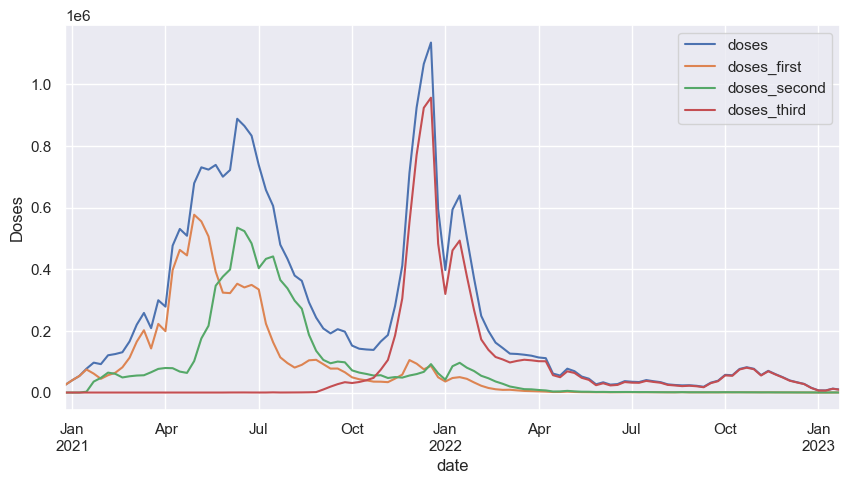

In [29]:
#Present total doses, first, second and third
week_vac[['doses', 'doses_first', 'doses_second','doses_third']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

In [28]:
#calculate cumsum for third dose
vaccines['persons_third_cumul']=vaccines['doses_third'].cumsum()
vaccines


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul
date,,,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,24418.0,8.0,1.0,0.0,99.963156,0.032751,0.004094,0.000000,0
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,18071.0,1.0,1.0,0.0,99.988934,0.005533,0.005533,0.000000,0
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,50228.0,0.0,1.0,0.0,99.998009,0.000000,0.001991,0.000000,0
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,64212.0,1.0,0.0,0.0,99.998443,0.001557,0.000000,0.000000,0
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,49983.0,2.0,0.0,0.0,99.995999,0.004001,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,11002,174,181,10647,181.0,64869802,63555851,138179497,31584858,12803049,918.0,13.0,0.0,10071.0,8.343937,0.118160,0.000000,91.537902,65843160
2023-02-02,12845,215,192,12438,192.0,64870017,63556043,138180485,31584864,12803049,988.0,6.0,0.0,11851.0,7.691709,0.046711,0.000000,92.261580,65855598
2023-02-03,8734,198,153,8383,153.0,64870215,63556196,138181255,31584869,12803049,770.0,5.0,0.0,7959.0,8.816121,0.057248,0.000000,91.126632,65863981


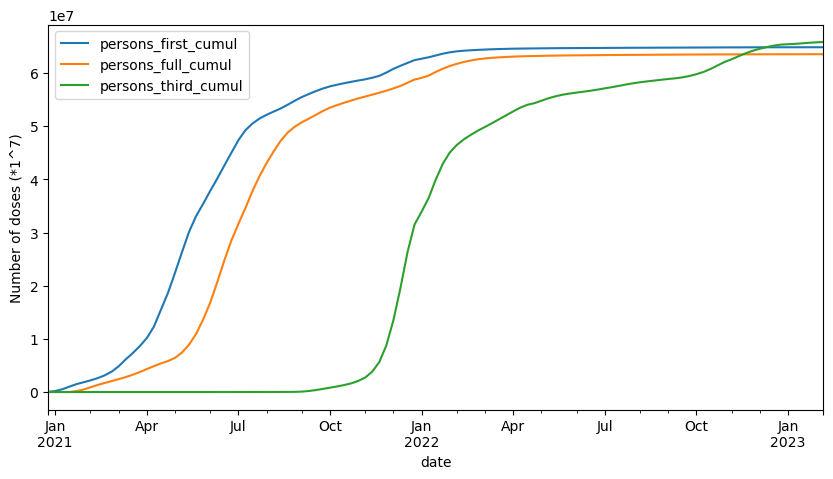

In [30]:
#What is the percentage of total population is vaccinated?
week_vac[['persons_first_cumul', 'persons_full_cumul','persons_third_cumul']].plot(ylabel="Number of doses (*1^7)", figsize=(10,5))
plt.show()

In [31]:
#Total population in Germany
print(demo['population'].sum())
#calculate % of vaccinated with first, second, third dose out of total population
vaccines['first_dose%']=(vaccines['persons_first_cumul']/demo['population'].sum())*100
vaccines['second_dose%']=(vaccines['persons_full_cumul']/demo['population'].sum())*100
vaccines['third_dose%']=(vaccines['persons_third_cumul']/demo['population'].sum())*100
vaccines.head()


83019213


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,...,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul,first_dose%,second_dose%,third_dose%
date,,,,,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,...,1.0,0.0,99.963156,0.032751,0.004094,0.0,0,0.029423,0.0,0.0
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,...,1.0,0.0,99.988934,0.005533,0.005533,0.0,0,0.051193,0.0,0.0
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,...,1.0,0.0,99.998009,0.000000,0.001991,0.0,0,0.111696,0.0,0.0
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,...,0.0,0.0,99.998443,0.001557,0.000000,0.0,0,0.189043,0.0,0.0
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,...,0.0,0.0,99.995999,0.004001,0.000000,0.0,0,0.249252,0.0,0.0


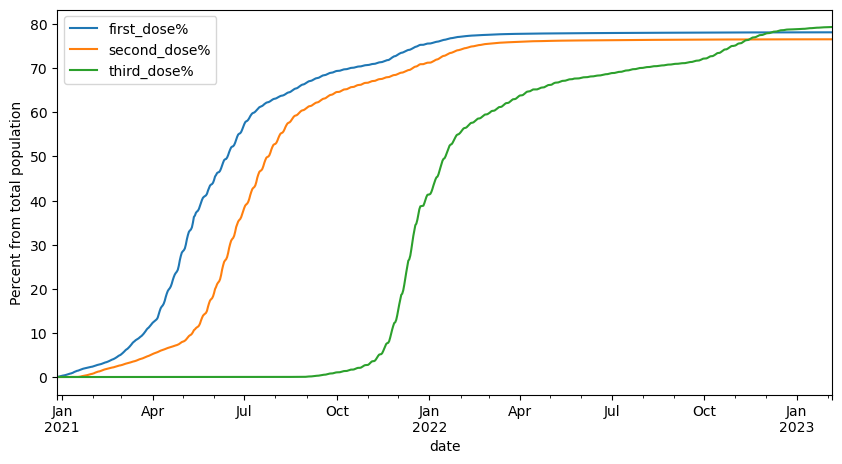

In [32]:
#The percentage of total population is vaccinated?
vaccines[['first_dose%','second_dose%','third_dose%']].plot(ylabel="Percent from total population", figsize=(10,5))
plt.show()

## Effect of vaccination on number of cases and deaths

In [144]:
covid

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1


<AxesSubplot:xlabel='date'>

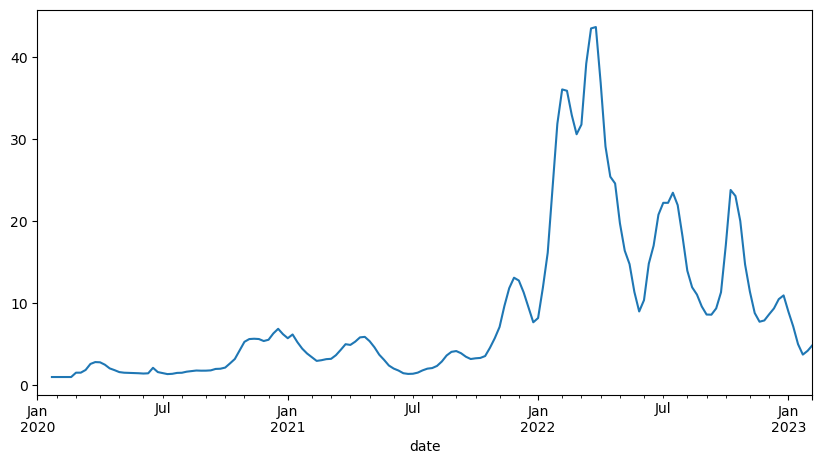

In [33]:

week_covid=covid.resample('W').mean()
week_covid['cases'].plot(figsize=(10,5))

In [71]:
covid_vaccines = covid.join(vaccines, how = 'left') 
print(covid_vaccines.shape)
covid_vaccines.sample(3)

(2890909, 29)


,state,county,age_group,gender,cases,deaths,recovered,doses,doses_first,doses_second,...,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul,first_dose%,second_dose%,third_dose%
date,,,,,,,,,,,,,,,,,,,,,
2022-04-02,Hessen,LK Schwalm-Eder-Kreis,05-14,M,28,0,28,34970.0,2039.0,4160.0,...,31.0,1695.0,75.147269,19.917072,0.088647,4.847012,53010822.0,77.812842,76.032459,63.853679
2020-04-30,Bayern,LK Neustadt a.d.Aisch-Bad Windsheim,35-59,F,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,Bayern,LK Muehldorf a.Inn,00-04,M,8,0,8,162682.0,10119.0,24445.0,...,38.0,4135.0,81.661155,15.773718,0.023358,2.541769,49632681.0,77.585242,75.540275,59.784572


In [35]:
covid_vaccines.columns

Index(['state', 'county', 'age_group', 'gender', 'cases', 'deaths',
       'recovered', 'doses', 'doses_first', 'doses_second', 'doses_third',
       'persons_full', 'persons_first_cumul', 'persons_full_cumul',
       'pfizer_cumul', 'moderna_cumul', 'astrazeneca_cumul', 'pfizer',
       'moderna', 'astrazeneca', 'other', 'pfizer%', 'moderna%',
       'astrazeneca%', 'other%', 'persons_third_cumul', 'first_dose%',
       'second_dose%', 'third_dose%'],
      dtype='object')

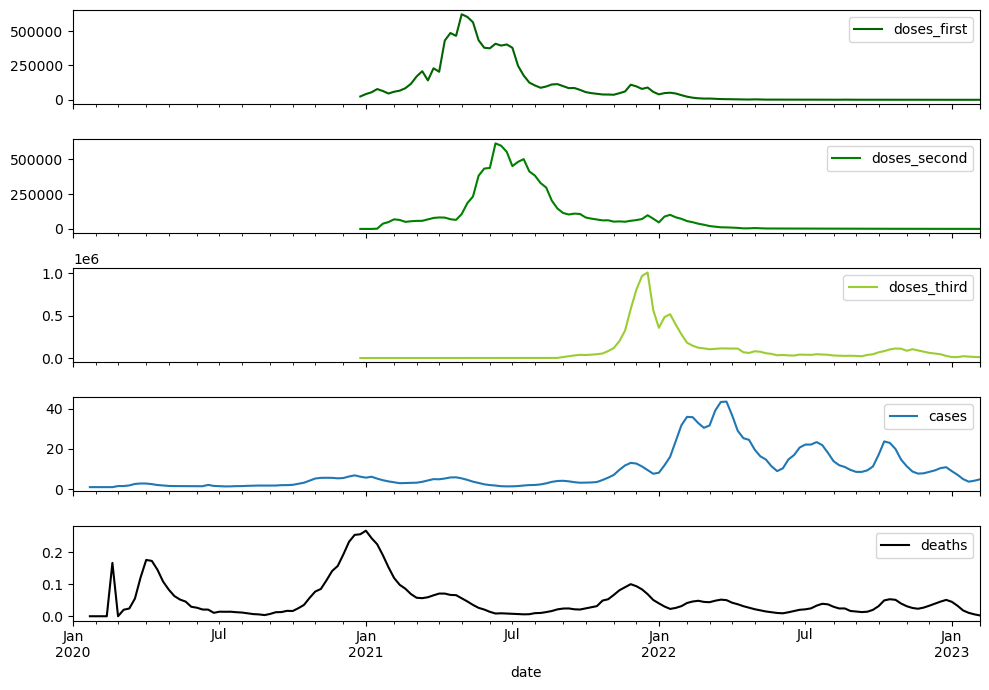

In [36]:
# craete subplots to visualise vaccination doses with cases and deaths ( same x axis)

week_vac_cases=covid_vaccines.resample('W').mean() # resize to weeks to have better graphic presentation

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True,figsize=(10,7))
week_vac_cases['doses_first'].plot(ax=axes[0],legend='first_dose', color='darkgreen' )
week_vac_cases['doses_second'].plot(ax=axes[1],legend='second_dose',color='green' )
week_vac_cases['doses_third'].plot(ax=axes[2],legend='third_dose', color='yellowgreen' )
week_vac_cases['cases'].plot(ax=axes[3], legend='cases')
week_vac_cases['deaths'].plot(ax=axes[4],legend='deaths',color='k')
fig.tight_layout()


In [75]:
# the date then 60%  were vaccinated with first dose

print(vaccines.index[vaccines['first_dose%'].searchsorted(60)])
# the date then 50%  were vaccinated with first dose
print(vaccines.index[vaccines['first_dose%'].searchsorted(50)])
# the date then 70%  were vaccinated with second dose
print(vaccines.index[vaccines['second_dose%'].searchsorted(60)])

# the date then 70%  were vaccinated with third dose
print(vaccines.index[vaccines['third_dose%'].searchsorted(60)])


2021-07-12 00:00:00
2021-06-15 00:00:00
2021-08-26 00:00:00
2022-03-03 00:00:00


#### What is the death ratio before 50% vaccination with 1 st dose?

In [76]:
#Calculate the death ratio before 50% of population were vaccinated
deaths0b=covid.loc[:'2020-06-15 00:00:00' ]['deaths'].sum() 
cases0b=covid.loc[:'2020-06-15 00:00:00' ]['cases'].sum()
print ( f'Number of deaths before  vaccination are {deaths0b} and number of cases are {cases0b}')

death_percent_b0=deaths0b/cases0b *100
print( f'percent of deaths before  vaccination are {death_percent_b0}')


Number of deaths before  vaccination are 9205 and number of cases are 187015
percent of deaths before  vaccination are 4.922065074993984


#### Count the percentage of deaths before and after first dose of vaccination (60% of population)

In [60]:

#before first dose
deaths1b=covid.loc[:'2021-07-12 00:00:00' ]['deaths'].sum() 
cases1b=covid.loc[:'2021-07-12 00:00:00' ]['cases'].sum()
print ( f'Number of deaths before 60% were vaccinated with first dose is {deaths1b} and number of cases is {cases1b}')

death_percent_b=deaths1b/cases1b *100
print( f'percent of deaths before 60% were vaccinated with first dose is {death_percent_b}')

#after first dose
deaths1a=covid.loc['2021-07-12 00:00:00' :]['deaths'].sum() 
cases1a=covid.loc['2021-07-12 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with first dose is {deaths1a}and number of cases is {cases1a}')

death_percent_a=deaths1a/cases1a *100
print( f'percent of deaths before 60% were vaccinated with first dose is {death_percent_a}')

#There is a great decrease in death % out of all cases following first dose of vaccination from 2.5% to 0.21%

Number of deaths before 60% were vaccinated with first dose is 92815 and number of cases is 3735491
percent of deaths before 60% were vaccinated with first dose is 2.4846800594620624

 Number of deaths after 60% were vaccinated with first dose is 73205and number of cases is 34074936
percent of deaths before 60% were vaccinated with first dose is 0.21483532646987216


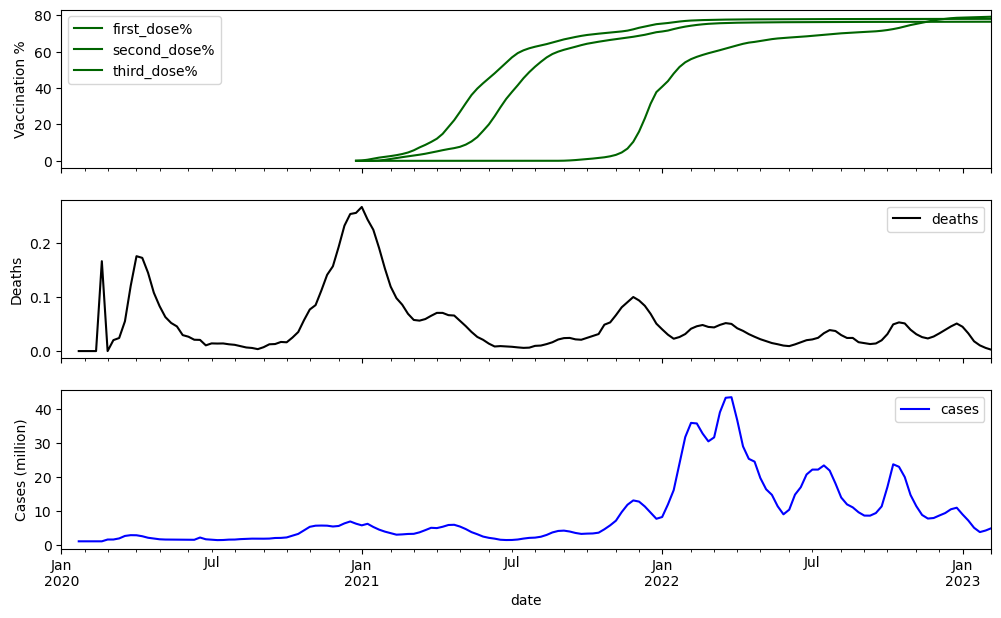

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(12,7))
week_vac_cases[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color='darkgreen' )
week_vac_cases['deaths'].plot(ax=axes[1],legend='deaths',color='k')
week_vac_cases['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')
axes[2].set_ylabel('Cases (million)')
#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

#### Count the percentage of deaths from the begining of vaccination vs after 60% of population  got their third dose of vaccination

In [62]:


#from begining of vaccination - 60% vaccinated with 3rd dose
deaths3b = covid.loc['2020-12-27 00:00:00':'2022-03-03 00:00:00', 'deaths'].sum()
cases3b=covid.loc['2020-12-27 00:00:00':'2022-03-03 00:00:00', 'cases'].sum()
print ( f'Number of deaths from begining of vaccination untill 60% were vaccinated with third dose are {deaths3b} and number of cases is {cases3b}')

death_percent_b3=deaths3b/cases3b *100
print( f'percent of deaths from begining of vaccination untill 60% were vaccinated with third dose are {death_percent_b3}')

#after first dose
deaths3a=covid.loc['2022-03-03 00:00:00' :]['deaths'].sum() 
cases3a=covid.loc['2022-03-03 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with third dose are {deaths3a}and number of cases are {cases3a}')

death_percent_a3=deaths3a/cases3a *100
print( f'percent of deaths before 60% were vaccinated with third dose are {death_percent_a3}')

#There is a great decrease in death % out of all cases following third dose of vaccination from 0.6% to 0.16%

Number of deaths from begining of vaccination untill 60% were vaccinated with third dose are 83291 and number of cases is 13936920
percent of deaths from begining of vaccination untill 60% were vaccinated with third dose are 0.5976284573636068

 Number of deaths after 60% were vaccinated with third dose are 36557and number of cases are 22435231
percent of deaths before 60% were vaccinated with third dose are 0.16294461153531248


In [45]:
#create df from begining of vaccination
vaccination_start=covid_vaccines.loc['2020-12-27 00:00:00':]
vaccination_start_weeks=vaccination_start.resample('W').mean() # resize by weeks for better visualization


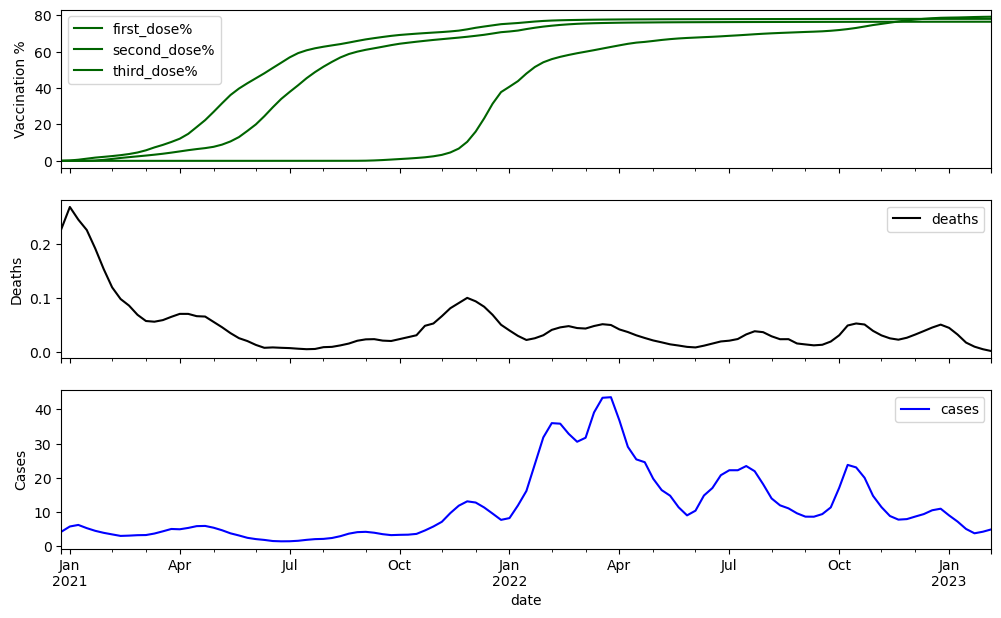

In [67]:
#visualize deaths in parralel with vaccination

fig, axes = plt.subplots(nrows=3,  sharex=True,figsize=(12,7))
vaccination_start_weeks[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color='darkgreen' )
vaccination_start_weeks['deaths'].plot(ax=axes[1],legend='deaths',color='k')
vaccination_start_weeks['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')
axes[2].set_ylabel('Cases')
#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

#### Does the 3rd dose of vaccination had beneficial effect on death rates or two doses were enough?

In [63]:
#create df from 60% vaccination with second dose 
vaccination_second=covid_vaccines.loc['2021-08-26 00:00:00':]
vaccination_second_weeks=vaccination_second.resample('W').mean() # resize by weeks for better visualization


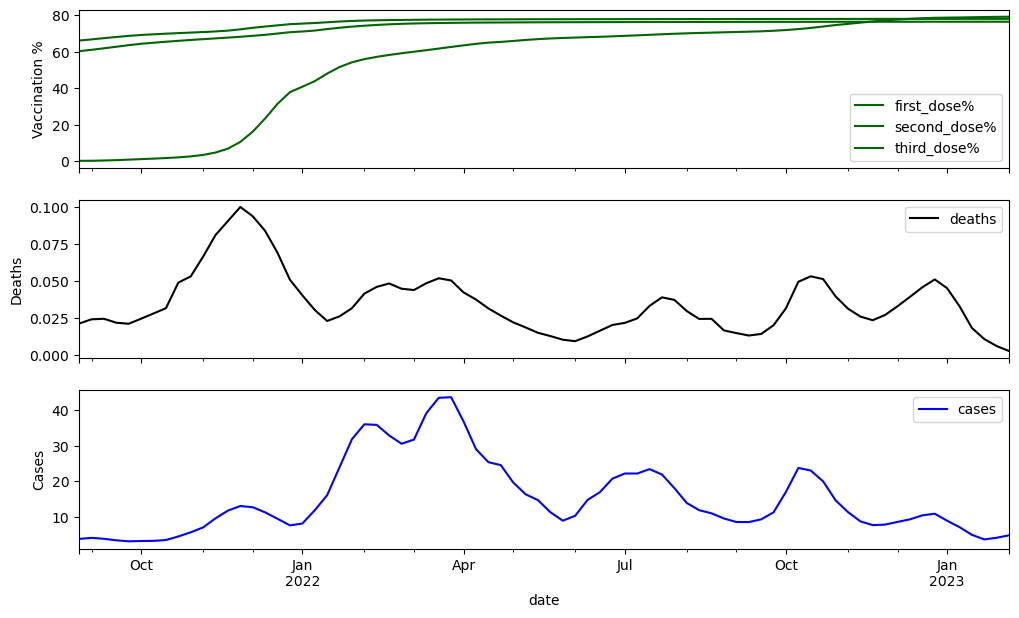

In [66]:
#visualize deaths in parralel with vaccination

fig, axes = plt.subplots(nrows=3,  sharex=True,figsize=(12,7))
vaccination_second_weeks[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color='darkgreen' )
vaccination_second_weeks['deaths'].plot(ax=axes[1],legend='deaths',color='k')
vaccination_second_weeks['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')
axes[2].set_ylabel('Cases')
#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

In [65]:


#from 60% second dose - 60% vaccinated with 3rd dose
deaths2b = vaccination_second.loc[:'2022-03-03 00:00:00', 'deaths'].sum()
cases2b=vaccination_second.loc[:'2022-03-03 00:00:00', 'cases'].sum()
print ( f'Number of deaths between 60% of second and third dose are {deaths2b} and number of cases are {cases2b}')

death_percent_b2=deaths2b/cases2b *100
print( f'percent of deaths between 60% of second and third dose are{death_percent_b2}')

#after third dose
deaths2a=covid.loc['2022-03-03 00:00:00' :]['deaths'].sum() 
cases2a=covid.loc['2022-03-03 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with third dose is {deaths2a}and number of cases is {cases2a}')

death_percent_a2=deaths2a/cases2a *100
print( f'percent of deaths before 60% were vaccinated with third dose is {death_percent_a2}')

#There is a beneficcial effect of the third vaccine on death rates compared to 2 doses. 
#Atfer 2 doses death rates are 0.99% after 3 doses it decresed to 0.2%

Number of deaths between 60% of second and third dose are 36162 and number of cases are 11680939
percent of deaths between 60% of second and third dose are0.3095812759573524

 Number of deaths after 60% were vaccinated with third dose is 36557and number of cases is 22435231
percent of deaths before 60% were vaccinated with third dose is 0.16294461153531248


## Join demo table with covid table to add the population 

In [105]:
#join covid table with demo table
covid_group=pd.DataFrame(covid.groupby(['state','gender','age_group']).agg('sum').round(0)) #setting the indexes
Dict = {'female':'F', 'male':'M'} # convert gender to be the same 
demo1=demo.replace({'gender':Dict})
demo1=demo1.set_index(['state','gender','age_group']) # setting the same index as in covid table to anable mearge

# create joined df 
covid_demo = covid_group.join(demo1, how = 'left') 
covid_demo.unstack(2)
covid_demo

cases  deaths  recovered  population  \
state              gender age_group                                           
Baden-Wuerttemberg F      00-04        66249       4      66032      261674   
                          05-14       293446       4     292887      490822   
                          15-34       764362      21     756813     1293488   
                          35-59      1003754     298     989018     1919649   
                          60-79       319322    1892     311156     1182736   
...                                      ...     ...        ...         ...   
Thueringen         M      05-14        51182       1      51104       92545   
                          15-34        99821      14      99243      214553   
                          35-59       161201     251     159711      384822   
                          60-79        63165    1639      60783      264189   
                          80-99        17266    2397      14491       57340   

                                      area  population_density  
state              gender age_group                             
Baden-Wuerttemberg F      00-04      35752          309.619965  
                          05-14      35752          309.619965  
                          15-34      35752          309.619965  
                          35-59      35752          309.619965  
                          60-79      35752          309.619965  
...                                    ...                 ...  
Thueringen         M      05-14      16172          132.521952  
                          15-34      16172          132.521952  
                          35-59      16172          132.521952  
                          60-79      16172          132.521952  
                          80-99      16172          132.521952  

[192 rows x 6 columns]

In [97]:
#add percentage of population columns
def PercentagePerPolpulation(part_of_population, population):
    #return part_of_population/population.astype(float).map("{:.2%}".format)
    return part_of_population/population

covid_demo['cases per population'] = covid_demo.apply(lambda x: PercentagePerPolpulation(x['cases'],x['population']), axis = 1)
covid_demo['deaths per population'] = covid_demo.apply(lambda x: PercentagePerPolpulation(x['deaths'],x['population']), axis = 1)
covid_demo['recoveries per population'] = covid_demo.apply(lambda x: PercentagePerPolpulation(x['recovered'],x['population']), axis = 1)
covid_demo

cases  deaths  recovered  population  \
state              gender age_group                                           
Baden-Wuerttemberg F      00-04        66249       4      66032      261674   
                          05-14       293446       4     292887      490822   
                          15-34       764362      21     756813     1293488   
                          35-59      1003754     298     989018     1919649   
                          60-79       319322    1892     311156     1182736   
...                                      ...     ...        ...         ...   
Thueringen         M      05-14        51182       1      51104       92545   
                          15-34        99821      14      99243      214553   
                          35-59       161201     251     159711      384822   
                          60-79        63165    1639      60783      264189   
                          80-99        17266    2397      14491       57340   

                                      area  population_density  \
state              gender age_group                              
Baden-Wuerttemberg F      00-04      35752          309.619965   
                          05-14      35752          309.619965   
                          15-34      35752          309.619965   
                          35-59      35752          309.619965   
                          60-79      35752          309.619965   
...                                    ...                 ...   
Thueringen         M      05-14      16172          132.521952   
                          15-34      16172          132.521952   
                          35-59      16172          132.521952   
                          60-79      16172          132.521952   
                          80-99      16172          132.521952   

                                     cases per population  \
state              gender age_group                         
Baden-Wuerttemberg F      00-04                  0.253174   
                          05-14                  0.597866   
                          15-34                  0.590931   
                          35-59                  0.522884   
                          60-79                  0.269986   
...                                                   ...   
Thueringen         M      05-14                  0.553050   
                          15-34                  0.465251   
                          35-59                  0.418898   
                          60-79                  0.239090   
                          80-99                  0.301116   

                                     deaths per population  \
state              gender age_group                          
Baden-Wuerttemberg F      00-04                   0.000015   
                          05-14                   0.000008   
                          15-34                   0.000016   
                          35-59                   0.000155   
                          60-79                   0.001600   
...                                                    ...   
Thueringen         M      05-14                   0.000011   
                          15-34                   0.000065   
                          35-59                   0.000652   
                          60-79                   0.006204   
                          80-99                   0.041803   

                                     recoveries per population  
state              gender age_group                             
Baden-Wuerttemberg F      00-04                       0.252345  
                          05-14                       0.596728  
                          15-34                       0.585095  
                          35-59                       0.515208  
                          60-79                       0.263082  
...                                                        ...  
Thueringen         M      05-14